In [30]:
# importing packages
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 

In [31]:
df = sns.load_dataset("penguins")

df.shape


(344, 7)

# Visualizing distributions of our 🐧 data 

For today, we will mostly stick to `seaborn` and its [distributions module](https://seaborn.pydata.org/api.html#distribution-api). By plotting the distribution of our data, we can get quick answers to many questions: 
- what is the central tendecy of our data
- are my values in a plausible (or expected) range
- is my data skewed or contains outliers
.. and many more.



## Plotting univariate distributions 

Lets use an `histogram` to visualize the distribution of our penguins flipper length. `Seaborn` offers multiple solutions, with `sns.displot` being one of them. 

Note: The bin size is usually automatically set for you based on the variance and number of observations - however this might sometimes lead to non-optimal results, eg. if you only have a relatively small number of observations per instance. To change that, we can either use the `bins=xx`or `binwidth=xx` parameter.

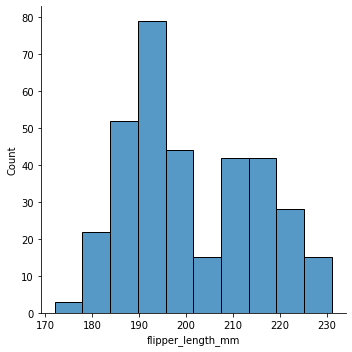

In [32]:
sns.displot(df, x="flipper_length_mm") #uses the same code as sns.histplot()

Lets try to break down the `flipper_length` distribution by `species`.

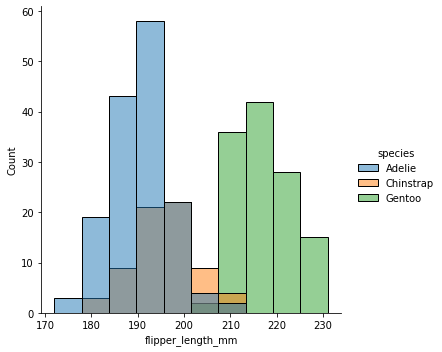

In [33]:
sns.displot(df, x="flipper_length_mm", hue="species") 

Sometimes, these visualization makes it difficult to disentangle each distribution. 
`Seaborn` offer seversal solutions to potentially overcome this:
- use `element="step"` to change to a step-plot
- use `multiple="stack"` to stack multiple distributions
- use `multiple="dodge"` to create non-overlapping bars.

Try some of these arguments and think about the pros and cons of each option!


###❗Note❗
If your groups have unequal number of observations, comparing distributions might not be ideal. For that `seaborn` offers different ways to normalize you data by using the `stat` argument. 


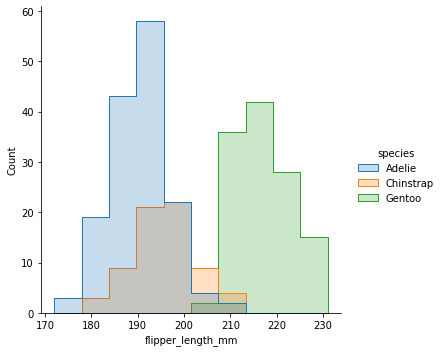

In [34]:
sns.displot(df, x="flipper_length_mm", hue="species", element="step") #step plot

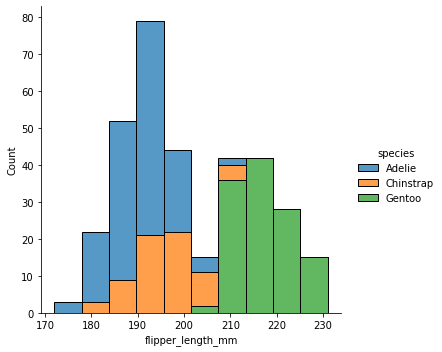

In [35]:
sns.displot(df, x="flipper_length_mm", hue="species", multiple="stack") #stack bins onto each other

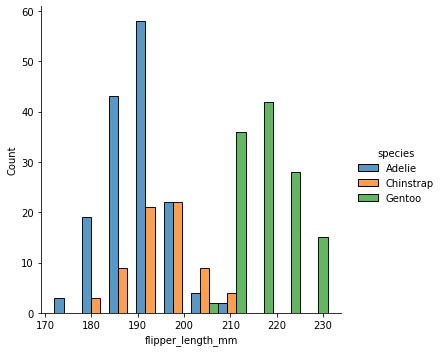

In [36]:
sns.displot(df, x="flipper_length_mm", hue="species", multiple="dodge") #no overlap, works fine for a small number of levels

# Kernel Density estimation

A different way to plot distributions are `KDE Plots`. Instead of using discrete bins, `KDE` smoothes the observations with a `Gaussian Kernel` and thus produces a continous estimation.

Conveniently, `sns.displot` can be also used to create `KDE` plots by setting the `kind` parameter to `kde`.
The smoothing bandwith relies on the `bw_adjust`, where one needs to find a good balance between under- and oversmoothing.


### ❗Note❗
- `KDE` plots might not be suitable for variables that are naturally bounded, e.g. a `bill at the restaurant` is usually > 0€. For this situation, the tails of the Gaussian might expand to < 0, which simply does not reflect the data properly. 
- Moreover `KDE` always returns a smooth curve, even if ther underlying data is not.

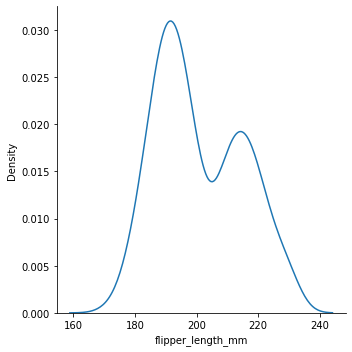

In [37]:
sns.displot(df, x="flipper_length_mm", kind="kde")

### try to play around with the bw_adjust parameter and see how it affects the bimodality

Since we are using the same `sns.displot` functionality, we can use all features already described above, for example, `stacked KDE plots`

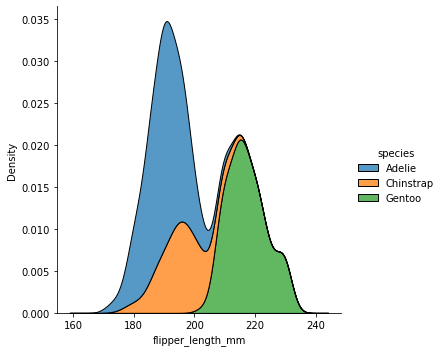

In [38]:
sns.displot(df, x="flipper_length_mm", hue="species", kind="kde", multiple="stack") # try using fill=True instead of multiple="stack"

# Plotting distributions of categorical data 

Beyond visualizing univariate distributions, we are often also interested whether distributions are different between groups. Comparing distributions can be achieved using for example:
- boxplots
- violinplots

For that, we can use the `sns.catplot` functionality. 

First lets boxplot our 🐧s flipper length as a function of species:



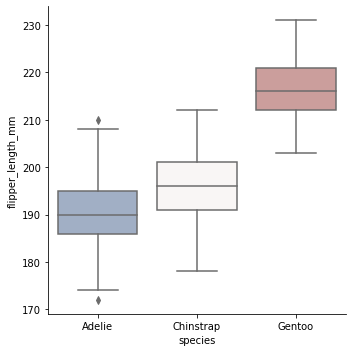

In [39]:
sns.catplot(data=df, x="species", y="flipper_length_mm", kind="box", palette="vlag") # equivalent to sns.boxplot(data=df, x="species", y="flipper_length_mm", palette="vlag") 

❗However, since `boxplots` show summary stats, some interesting features of the data might be hidden. See for example how different data leads to the same `boxplot`❗



![](https://camo.githubusercontent.com/0f76c6960f20881ca05fbaeecc14c0739db2887cc5903d4093a592782ee5d981/68747470733a2f2f616e6e616c6c6f79642e66696c65732e776f726470726573732e636f6d2f323031392f30322f626f78706c6f74732e676966)


To overcome this, we could for example overlay our boxplots with the data, using `sns.stripplot`, which can be done just as easy as:

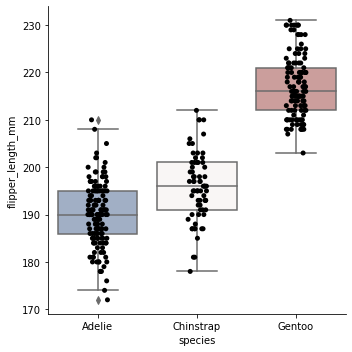

In [40]:
sns.catplot(data=df, x="species", y="flipper_length_mm", kind="box", palette="vlag")
sns.stripplot(data=df, x="species", y="flipper_length_mm", color="black") #try to overlay our boxplot with our data points in black 

Seeing the individual data points is already much better, but we can also go one step further and combine a `boxplot` with a `KDE` and use `sns.violinplot`.
Now using `sns.catplot` comes in handy, as we only need to adjust the `kind` parameter.

The `violinpot` shows the distribution of the data, as well as the whisker and quartiles of the boxplot inside the violin. Keep in mind, that since the `violinplot` also contains a `KDE`, you might also want to check additional parameters, such as the bandwith (ie `bw`).

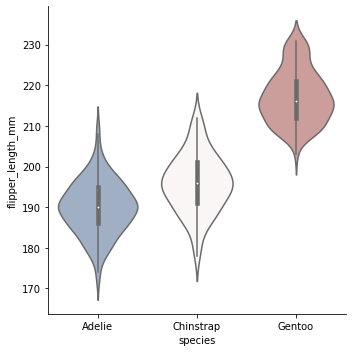

In [41]:
sns.catplot(data=df, x="species", y="flipper_length_mm", kind="violin", palette="vlag") # see also sns.violinplot()
# try to adjust the bw parameter and see how it affects your violins


Now try to plot the `violinplot` again but with `x- and y-axis` being switched. Additionally try to also incorporate the `sex` information and find a way that you will end up having 3 and not 6 (3 species * 2 sex) violins. 

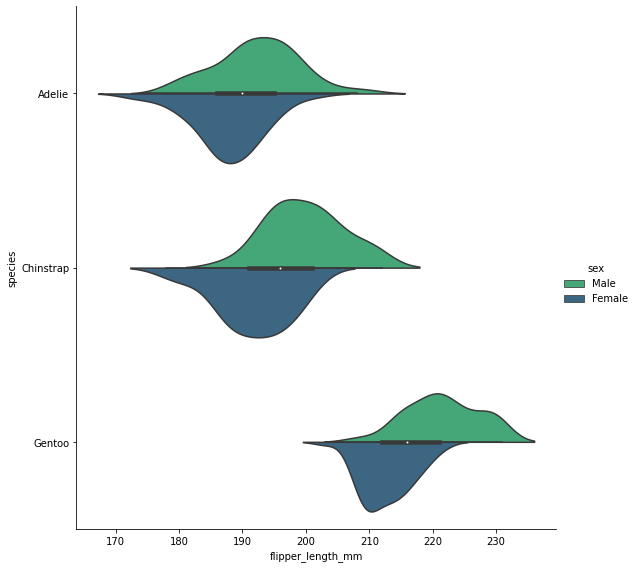

In [42]:
sns.catplot(data=df, y="species", x="flipper_length_mm", kind="violin", 
            palette="viridis_r", hue="sex", split=True, height=8, aspect=1) 


### Note
Using `sns.catplot()` with different `kind` parameters come with a certain advantage, ie., we can very easily introduce additional variables to split our data and investigate higher-order relationship. Yesterday we did the same thing using `sns.lmplot` in which we split the data for `species` and within each species stratified our plot for `sex`.

This is called a [Facetgrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) and allows you to plot something like: 

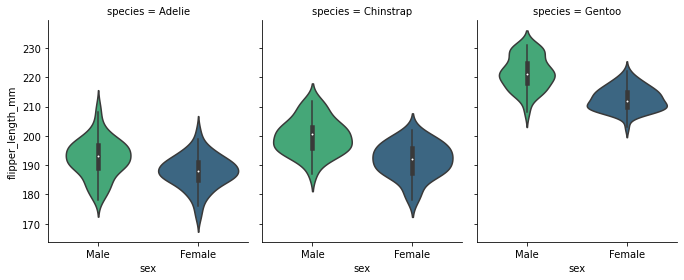

In [47]:
sns.catplot(data=df, x="sex", y="flipper_length_mm", kind="violin", 
            palette="viridis_r", col="species", height=4, aspect=0.8) #Note that Facetgrids can be sized with the height and aspect parameter!

# Other useful plots to visualize distributions

- `sns.jointplot` combines a `scatterplot` with `marginal distributions`
- barplots, using `sns.catplot` with `kind=bar` (see [documentation](https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot) )
- `sns.displot` with two variables (x,y) for bivariate distributions
- `sns.pairplot` to visualize the relationship between all variables + their distributions in a dataframe (see [documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot))

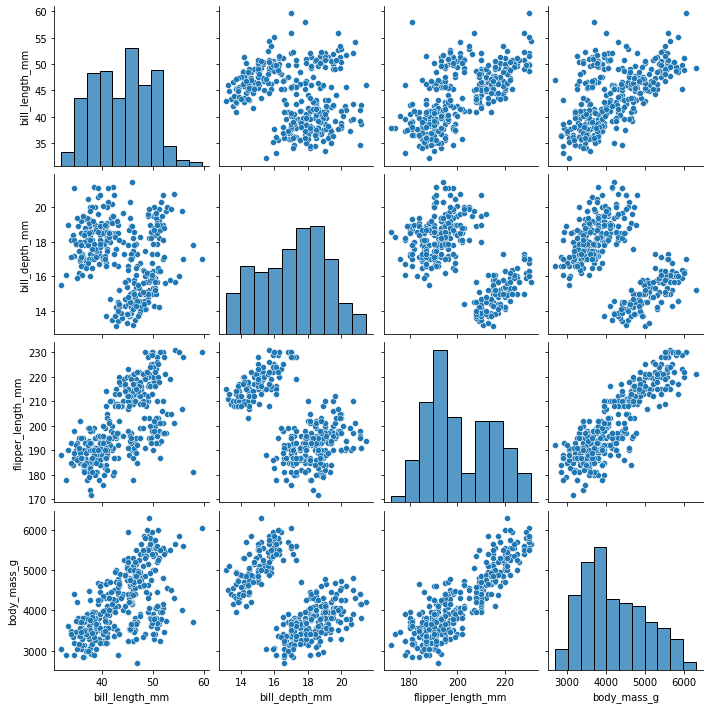

In [44]:
sns.pairplot(df) #try to incorporate species again

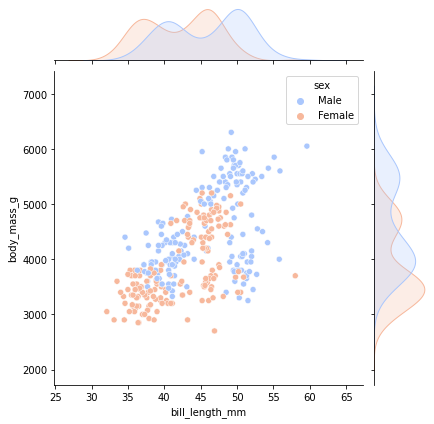

In [45]:
sns.jointplot(data=df, x="bill_length_mm", y="body_mass_g", hue="sex", palette="coolwarm")